<p style="text-align:center">
PSY 394U <b>Data Analytics with Python</b>, Spring 2018


<img style="width: 400px; padding: 0px;" src="https://github.com/sathayas/JupyterAnalyticsSpring2018/blob/master/images/Title_pics.png?raw=true" alt="title pics"/>

</p>

<p style="text-align:center; font-size:40px; margin-bottom: 30px;"><b> Network community </b></p>

<p style="text-align:center; font-size:18px; margin-bottom: 32px;"><b>April 10, 2018</b></p>

<hr style="height:5px;border:none" />

# 1. What are network communities?
<hr style="height:1px;border:none" />

In some network data, you may observe that some nodes are strongly interconnected among themselves, forming clusters. On the other hand, connections between such clusters are very sparse. Such interconnected clusters of nodes are often referred as clusters, ***communities***, or ***modules***. Here is a toy example of such clusters. 

`<ToyCommunityExamples.py>`

In [2]:
%matplotlib inline

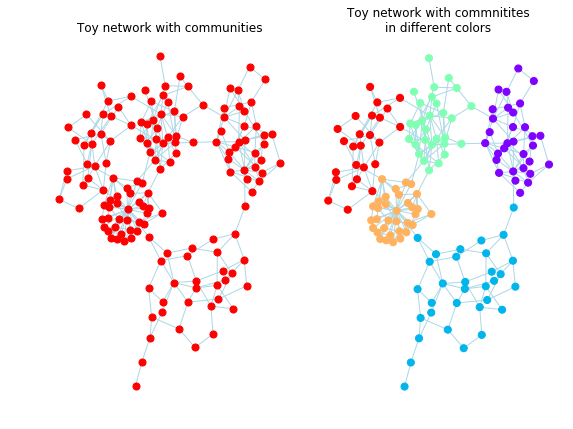

In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms.community import LFR_benchmark_graph


# first, a simple toy example of modular network
n = 150
tau1 = 3.0
tau2 = 2.0
mu = 0.0675
G_list = []
G = LFR_benchmark_graph(n, tau1, tau2, mu, average_degree=5,
                        min_community=25, seed=10)



# drawing the graph --- Kamada-Kawai layout
# without community assignment
plt.figure(figsize=[8,6])

plt.subplot(121)
pos = nx.kamada_kawai_layout(G, weight=None) # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=50)
nx.draw_networkx_edges(G, pos, edge_color='lightblue')
plt.title('Toy network with communities')
plt.axis('off')

# extracting community assignment indices
commIndSet = {frozenset(G.nodes[v]['community']) for v in G}
commInd = [list(x) for x in iter(commIndSet)]

# drawing with community assignment
plt.subplot(122)
for iComm in range(len(commInd)):
    nx.draw_networkx_nodes(G, pos, nodelist=commInd[iComm],
                           cmap=plt.cm.rainbow, vmin=0, vmax=len(commInd)-1,
                           node_color = [iComm]*len(commInd[iComm]),
                           node_size=50)
nx.draw_networkx_edges(G, pos, edge_color='lightblue')
plt.title('Toy network with commnitites\nin different colors')
plt.axis('off')

plt.subplots_adjust(hspace=0.15, wspace=0.075, bottom=0.025, top=0.875,
                    left=0.05, right=0.95)
plt.show()

In this particular example, only 6.75% of edges are connecting communities, while the remaining 93.25% of edges are for within-community connections. Since inter-community connections are so sparse, communities are readily identifiable just by looking at the network. However, as the fraction of inter-community connections increases, communities becomes less obvious. 

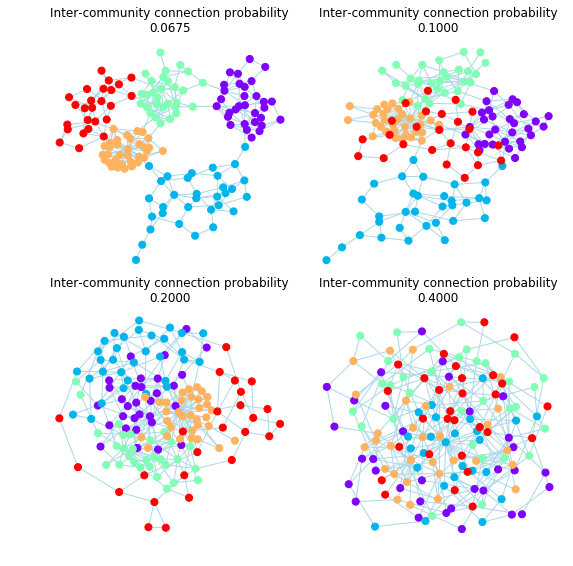

In [4]:
# generating toy networks with different inter-community connection prob
n = 150
tau1 = 3.0
tau2 = 2.0
mu = [0.0675, 0.10, 0.20, 0.40]
G_list = []
for imu in mu:
    G = LFR_benchmark_graph(n, tau1, tau2, imu, average_degree=5,
                            min_community=25, seed=10)
    G_list.append(G)

    
    

# drawing the graph --- Kamada-Kawai layout
plt.figure(figsize=[8,8])
for i,imu in enumerate(mu):
    plt.subplot(2,2,i+1)
    G = G_list[i]
    commIndSet = {frozenset(G.nodes[v]['community']) for v in G}
    commInd = [list(x) for x in iter(commIndSet)]

    pos = nx.kamada_kawai_layout(G, weight=None) # positions for all nodes
    for iComm in range(len(commInd)):
        nx.draw_networkx_nodes(G, pos, nodelist=commInd[iComm],
                               cmap=plt.cm.rainbow, vmin=0, vmax=len(commInd)-1,
                               node_color = [iComm]*len(commInd[iComm]),
                               node_size=50)
    nx.draw_networkx_edges(G, pos, edge_color='lightblue')
    plt.title('Inter-community connection probability\n%6.4f' % imu)
    plt.axis('off')

plt.subplots_adjust(hspace=0.15, wspace=0.075, bottom=0.025, top=0.9,
                    left=0.05, right=0.95)
plt.show()

## Why should we care about network communities?

Because identifying network communities often reveal the underlying partition or grouping of nodes solely based on network connections. Here are two examples of that.

The first example shows the network communities in the karate club network, estimated by two methods (label propagation and Girvan-Newman methods; we will cover these later). This network represents a karate club at a university, split into two groups due to an internal dispute. This data set is a well-studied network in social science.

`<CommunityExamples.py>`

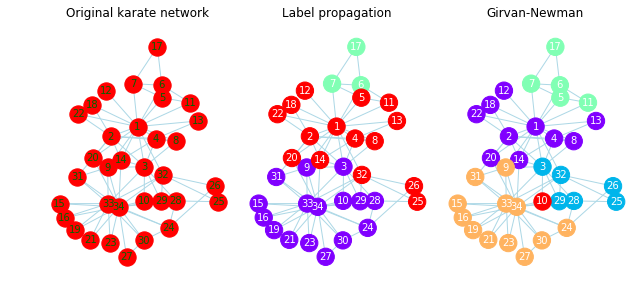

In [5]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms.community import label_propagation_communities
from networkx.algorithms.community import girvan_newman, modularity


# girman-newman method, optimized with modularity
def girvan_newman_opt(G, verbose=False):
    runningMaxMod = 0
    commIndSetFull = girvan_newman(G)
    for iNumComm in range(2,len(G)):
        if verbose:
            print('Commnity detection iteration : %d' % iNumComm)
        iPartition = next(commIndSetFull)  # partition with iNumComm communities
        Q = modularity(G, iPartition)  # modularity
        if Q>runningMaxMod:  # saving the optimum partition and associated info
            runningMaxMod = Q
            OptPartition = iPartition
    return OptPartition



# loading network data
G_karate = nx.read_gml('karate.gml', label='id')  # Karate network
G_football = nx.read_gml('football.gml')  # Football network


# Community detection with the label propagation algorithm
commIndSet_karate = label_propagation_communities(G_karate)
commInd_karate_lp = [list(x) for x in iter(commIndSet_karate)]

commIndSet_football = label_propagation_communities(G_football)
commInd_football_lp = [list(x) for x in iter(commIndSet_football)]


# Community detection with the girvan-newman algorithm
commInd_karate_gn = girvan_newman_opt(G_karate)
commInd_football_gn = girvan_newman_opt(G_football)



# drawing the graph (karate network)
plt.figure(figsize=[9,4])

# first, graph without community assignments
plt.subplot(131)
pos = nx.kamada_kawai_layout(G_karate, weight=None) # positions for all nodes
nx.draw_networkx_nodes(G_karate, pos)
nx.draw_networkx_edges(G_karate, pos,
                       edge_color='lightblue')
nx.draw_networkx_labels(G_karate, pos, font_size=10, font_color='DarkGreen')
plt.title('Original karate network')
plt.axis('off')
plt.xlim([-0.6, 0.65])
plt.ylim([-0.85, 1.2])

# next, graph with communities in different colors (label propagation)
plt.subplot(132)
for iComm in range(len(commInd_karate_lp)):
    nx.draw_networkx_nodes(G_karate, pos, nodelist=commInd_karate_lp[iComm],
                           cmap=plt.cm.rainbow,
                           vmin=0, vmax=len(commInd_karate_lp)-1,
                           node_color = [iComm]*len(commInd_karate_lp[iComm]),
                           node_size=300)
nx.draw_networkx_edges(G_karate, pos,
                       edge_color='lightblue')
nx.draw_networkx_labels(G_karate, pos, font_size=10, font_color='White')
plt.title('Label propagation')
plt.axis('off')
plt.xlim([-0.6, 0.65])
plt.ylim([-0.85, 1.2])

# (girvan-newman)
plt.subplot(133)
for iComm in range(len(commInd_karate_gn)):
    nx.draw_networkx_nodes(G_karate, pos, nodelist=commInd_karate_gn[iComm],
                           cmap=plt.cm.rainbow,
                           vmin=0, vmax=len(commInd_karate_gn)-1,
                           node_color = [iComm]*len(commInd_karate_gn[iComm]),
                           node_size=300)
nx.draw_networkx_edges(G_karate, pos,
                       edge_color='lightblue')
nx.draw_networkx_labels(G_karate, pos, font_size=10, font_color='White')
plt.title('Girvan-Newman')
plt.axis('off')
plt.xlim([-0.6, 0.65])
plt.ylim([-0.85, 1.2])

plt.subplots_adjust(hspace=0.15, wspace=0.075, bottom=0.025, top=0.875,
                    left=0.05, right=0.95)
plt.show()

The second example is the college football network. As you can imagine, schools belonging to the same conference tend to play more often among themselves, compared to schools in different conferences. The two estimation methods produced a fairly good result predicting these conferences.

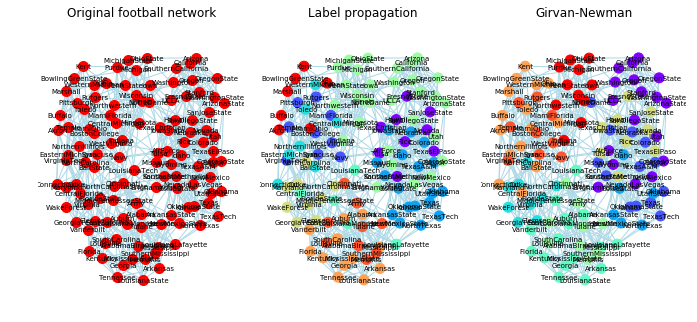

In [6]:
# drawing the graph (football network)
plt.figure(figsize=[10,4.5])
plt.subplot(131)

# first, graph without community assignments
pos = nx.kamada_kawai_layout(G_football, weight=None) # positions for all nodes
nx.draw_networkx_nodes(G_football, pos, node_size=100)
nx.draw_networkx_edges(G_football, pos,
                       edge_color='lightblue')
nx.draw_networkx_labels(G_football, pos, font_size=7, font_color='Black')
plt.title('Original football network')
plt.axis('off')
plt.xlim([-1.15, 1.15])
plt.ylim([-1.15, 1.15])

# next, graph with communities in different colors (label propagation)
plt.subplot(132)
for iComm in range(len(commInd_football_lp)):
    nx.draw_networkx_nodes(G_football, pos, nodelist=commInd_football_lp[iComm],
                           cmap=plt.cm.rainbow,
                           vmin=0, vmax=len(commInd_football_lp)-1,
                           node_color = [iComm]*len(commInd_football_lp[iComm]),
                           node_size=100)
nx.draw_networkx_edges(G_football, pos,
                       edge_color='lightblue')
nx.draw_networkx_labels(G_football, pos, font_size=7, font_color='Black')
plt.title('Label propagation')
plt.axis('off')
plt.xlim([-1.15, 1.15])
plt.ylim([-1.15, 1.15])

# (girvan-newman)
plt.subplot(133)
for iComm in range(len(commInd_football_gn)):
    nx.draw_networkx_nodes(G_football, pos, nodelist=commInd_football_gn[iComm],
                           cmap=plt.cm.rainbow,
                           vmin=0, vmax=len(commInd_football_gn)-1,
                           node_color = [iComm]*len(commInd_football_gn[iComm]),
                           node_size=100)
nx.draw_networkx_edges(G_football, pos,
                       edge_color='lightblue')
nx.draw_networkx_labels(G_football, pos, font_size=7, font_color='Black')
plt.title('Girvan-Newman')
plt.axis('off')
plt.xlim([-1.15, 1.15])
plt.ylim([-1.15, 1.15])


plt.subplots_adjust(hspace=0.15, wspace=0.075, bottom=0.025, top=0.875,
                    left=0.05, right=0.95)
plt.show()